# Explore here

Librerias

In [48]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Cargo los datos

In [49]:
train_data = pd.read_csv(
    "/workspaces/Proyecto_Regresi-n_Log-stica_/data/raw/bank-marketing-campaign-data (1).csv",
    sep=';',
    encoding='utf-8'
)

test_data = train_data.copy()

Hago un test y un train

In [50]:
X = train_data.drop(columns=["y"])
y = train_data["y"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Tamaño de entrenamiento: {X_train.shape}")
print(f"Tamaño de prueba: {X_test.shape}")



Tamaño de entrenamiento: (32950, 20)
Tamaño de prueba: (8238, 20)


Codifico las variables categoricas (busqué en internet una nueva forma de hacerlo)

In [51]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

Alineo las columnas

In [52]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

Convierto en binarias las columnas

In [53]:
y_train = y_train.map({'yes': 1, 'no': 0})
y_test = y_test.map({'yes': 1, 'no': 0})

Entreno al modelo

In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
model = LogisticRegression(max_iter=2000, solver='lbfgs')
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


Hago las predicciones

In [56]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.3f}")

Precisión del modelo: 0.916


Evaluo el modelo

In [57]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.3f}")

Precisión del modelo: 0.916


Hago la matriz de confusión como en la teoría

In [58]:
bank_cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(bank_cm,
    index=['Real No Contrata', 'Real Sí Contrata'],
    columns=['Pred. No Contrata', 'Pred. Sí Contrata']
)

Pinto la gráfica

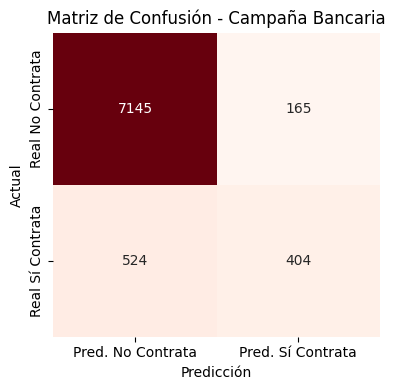

In [59]:
plt.figure(figsize=(4,4))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title("Matriz de Confusión - Campaña Bancaria")
plt.ylabel("Actual")
plt.xlabel("Predicción")
plt.tight_layout()
plt.show()